# Predicting Popular Youtube Video Categories Using Machine Learning

### Project Description
This project focuses on solving a problem presented by a content creator community. At the 
moment, the community is searching for ways to create more viral videos on Youtube. Using a ridge regression algorithm in 
combination with a public domain trending Youtube top-trending video dataset, my model will learn to predict what 
categories of videos trend within the U.S. and thus give the content creators ideas about what they could create.

### Project Goals and Purpose
The purpose of this project is to offer a struggling content creator community a way to predict what 
Youtube videos may be popular in the future and use those predictions as topics for their next videos. The goals of this 
project are to create a machine learning model that is able to accurately predict what types of Youtube videos will be 
popular in the future and offer ideas on what Youtube video topics the content creator community could make.

### Problem Definition
> How well can we predict a good category for a youtube video based on features given by a user?

### Data
The data is downloaded from the Kaggle, "Trending YouTube Video Statistics" dataset. 

Information on the features:
* The data also includes a category_id field, which varies between regions. To retrieve the categories for a specific video, find it in the associated JSON. One such file is included for each of the five regions in the dataset.

Link: https://www.kaggle.com/datasets/datasnaek/youtube-new

* What the category IDs reference to is found in the accompanying json document.

### Evalutation
The evaluation metric for this project is the mean absolute error between actual popular videos in a particular category and the predicted popular videos in a particular category.

**Note:** The goal for most regression evaluation metrics is to mimimize the error.

### Features
Kaggle includes this description of the features of this dataset: Data includes the video title, channel title, publish time, tags, views, likes and dislikes, description, and comment count.


In [1]:
# Starting imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import Ridge
import json
import ipywidgets as widgets
%matplotlib inline

In [2]:
# Import the data
youtube_csv_df = pd.read_csv("US_youtube_trending_data.csv")

In [3]:
# Sort the data by the view_count
#youtube_csv_df.columns
sorted_youtube_statistics = youtube_csv_df.sort_values(["view_count"], ascending=False)
sorted_youtube_statistics.head(10)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
56374,WMweEpGlu_U,BTS (방탄소년단) 'Butter' Official MV,2021-05-21T03:46:13Z,UC3IZKseVpdzPSBaWxBxundA,HYBE LABELS,10,2021-05-30T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,264407389,16021534,150989,6738537,https://i.ytimg.com/vi/WMweEpGlu_U/default.jpg,False,False,BTS (방탄소년단) 'Butter' Official MV Credits: Dire...
3358,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,10,2020-08-28T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,232649205,15735533,714194,6065230,https://i.ytimg.com/vi/gdZLi9oWNZg/default.jpg,False,False,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...
3137,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,10,2020-08-27T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,219110491,15460822,674291,5810680,https://i.ytimg.com/vi/gdZLi9oWNZg/default.jpg,False,False,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...
2894,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,10,2020-08-26T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,208581468,15246496,646349,5744496,https://i.ytimg.com/vi/gdZLi9oWNZg/default.jpg,False,False,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...
73564,hdmx71UjBXs,Turn into orbeez - Tutorial #Shorts,2021-07-03T04:04:57Z,UCt8z2S30Wl-GQEluFVM8NUw,FFUNTV,24,2021-08-08T00:00:00Z,[None],206202284,6840430,240769,2826,https://i.ytimg.com/vi/hdmx71UjBXs/default.jpg,False,False,Turn into orbeez - Tutorial #ShortsHey guys! W...
73361,hdmx71UjBXs,Turn into orbeez - Tutorial #Shorts,2021-07-03T04:04:57Z,UCt8z2S30Wl-GQEluFVM8NUw,FFUNTV,24,2021-08-07T00:00:00Z,[None],204846218,6791654,237038,2792,https://i.ytimg.com/vi/hdmx71UjBXs/default.jpg,False,False,Turn into orbeez - Tutorial #ShortsHey guys! W...
73162,hdmx71UjBXs,Turn into orbeez - Tutorial #Shorts,2021-07-03T04:04:57Z,UCt8z2S30Wl-GQEluFVM8NUw,FFUNTV,24,2021-08-06T00:00:00Z,[None],203532581,6745231,233458,2765,https://i.ytimg.com/vi/hdmx71UjBXs/default.jpg,False,False,Turn into orbeez - Tutorial #ShortsHey guys! W...
72959,hdmx71UjBXs,Turn into orbeez - Tutorial #Shorts,2021-07-03T04:04:57Z,UCt8z2S30Wl-GQEluFVM8NUw,FFUNTV,24,2021-08-05T00:00:00Z,[None],202486840,6707446,230736,2744,https://i.ytimg.com/vi/hdmx71UjBXs/default.jpg,False,False,Turn into orbeez - Tutorial #ShortsHey guys! W...
72751,hdmx71UjBXs,Turn into orbeez - Tutorial #Shorts,2021-07-03T04:04:57Z,UCt8z2S30Wl-GQEluFVM8NUw,FFUNTV,24,2021-08-04T00:00:00Z,[None],201255646,6667435,227781,2713,https://i.ytimg.com/vi/hdmx71UjBXs/default.jpg,False,False,Turn into orbeez - Tutorial #ShortsHey guys! W...
2653,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,10,2020-08-25T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,200692965,14994034,621578,5623570,https://i.ytimg.com/vi/gdZLi9oWNZg/default.jpg,False,False,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...


In [4]:
f = open("US_category_id.json")
category_ids = json.load(f)
category_ids["items"]

[{'kind': 'youtube#videoCategory',
  'etag': 'IfWa37JGcqZs-jZeAyFGkbeh6bc',
  'id': '1',
  'snippet': {'title': 'Film & Animation',
   'assignable': True,
   'channelId': 'UCBR8-60-B28hp2BmDPdntcQ'}},
 {'kind': 'youtube#videoCategory',
  'etag': '5XGylIs7zkjHh5940dsT5862m1Y',
  'id': '2',
  'snippet': {'title': 'Autos & Vehicles',
   'assignable': True,
   'channelId': 'UCBR8-60-B28hp2BmDPdntcQ'}},
 {'kind': 'youtube#videoCategory',
  'etag': 'HCjFMARbBeWjpm6PDfReCOMOZGA',
  'id': '10',
  'snippet': {'title': 'Music',
   'assignable': True,
   'channelId': 'UCBR8-60-B28hp2BmDPdntcQ'}},
 {'kind': 'youtube#videoCategory',
  'etag': 'ra8H7xyAfmE2FewsDabE3TUSq10',
  'id': '15',
  'snippet': {'title': 'Pets & Animals',
   'assignable': True,
   'channelId': 'UCBR8-60-B28hp2BmDPdntcQ'}},
 {'kind': 'youtube#videoCategory',
  'etag': '7mqChSJogdF3hSIL-88BfDE-W8M',
  'id': '17',
  'snippet': {'title': 'Sports',
   'assignable': True,
   'channelId': 'UCBR8-60-B28hp2BmDPdntcQ'}},
 {'kind': 'yout

In [5]:
youtube_csv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119591 entries, 0 to 119590
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           119591 non-null  object
 1   title              119591 non-null  object
 2   publishedAt        119591 non-null  object
 3   channelId          119591 non-null  object
 4   channelTitle       119591 non-null  object
 5   categoryId         119591 non-null  int64 
 6   trending_date      119591 non-null  object
 7   tags               119591 non-null  object
 8   view_count         119591 non-null  int64 
 9   likes              119591 non-null  int64 
 10  dislikes           119591 non-null  int64 
 11  comment_count      119591 non-null  int64 
 12  thumbnail_link     119591 non-null  object
 13  comments_disabled  119591 non-null  bool  
 14  ratings_disabled   119591 non-null  bool  
 15  description        116215 non-null  object
dtypes: bool(2), int64(5)

In [6]:
youtube_csv_df.columns

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description'],
      dtype='object')

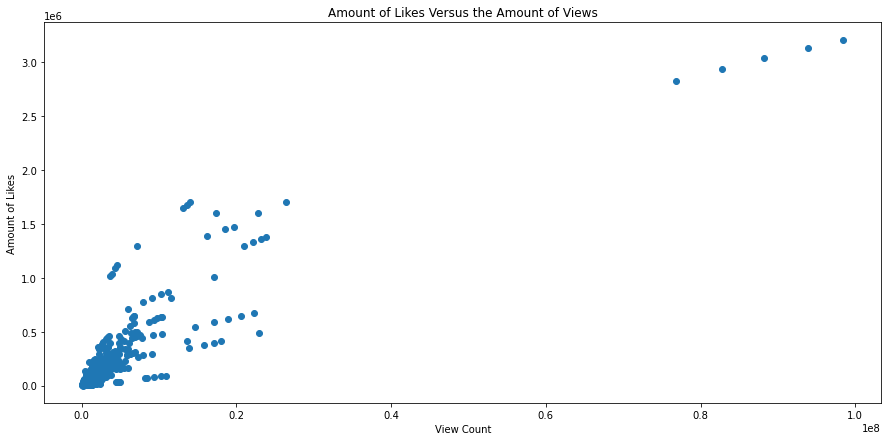

In [7]:
fig, ax = plt.subplots(figsize=(15,7))
ax.scatter(youtube_csv_df["view_count"][:1000], youtube_csv_df["likes"][:1000])
ax.set(xlabel="View Count",
      ylabel="Amount of Likes",
      title="Amount of Likes Versus the Amount of Views")
plt.show()

In [8]:
youtube_csv_df.columns

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description'],
      dtype='object')

In [9]:
youtube_csv_df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


# Searching for the Top Five Categories

## Ratio of Views Versus the Category IDs

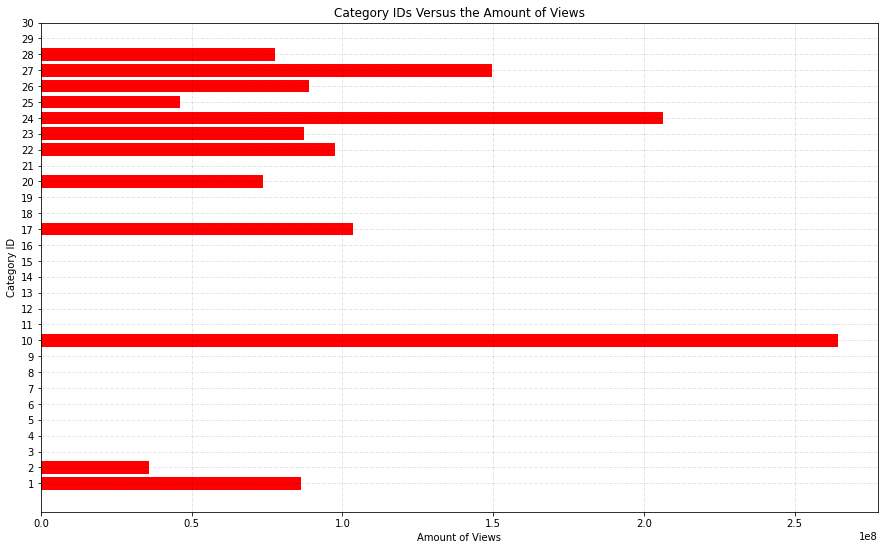

In [10]:
# Looking at the dataframe based on view_count versus category ID
fig, ax = plt.subplots(figsize=(15,9))
ax.barh(sorted_youtube_statistics["categoryId"][:1000], 
        sorted_youtube_statistics["view_count"][:1000],
       color="red")
ax.set_xlabel("Amount of Views")
ax.set_ylabel("Category ID")
plt.title("Category IDs Versus the Amount of Views")
ax.grid(color ='black',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
plt.yticks(np.arange(1, 31, step=1))
plt.show()
# Most popular IDs when compared against view_count: 10, 24, 27, 17, 22
# 10 is music, 24 is entertainment, 27 is education, 17 is sports, and 22 is People & Blogs.

In [11]:
#Category IDs according to the attached json file
category_ids

{'kind': 'youtube#videoCategoryListResponse',
 'etag': 'HIrK3n45Uw2IYz9_U2-gK1OsXvo',
 'items': [{'kind': 'youtube#videoCategory',
   'etag': 'IfWa37JGcqZs-jZeAyFGkbeh6bc',
   'id': '1',
   'snippet': {'title': 'Film & Animation',
    'assignable': True,
    'channelId': 'UCBR8-60-B28hp2BmDPdntcQ'}},
  {'kind': 'youtube#videoCategory',
   'etag': '5XGylIs7zkjHh5940dsT5862m1Y',
   'id': '2',
   'snippet': {'title': 'Autos & Vehicles',
    'assignable': True,
    'channelId': 'UCBR8-60-B28hp2BmDPdntcQ'}},
  {'kind': 'youtube#videoCategory',
   'etag': 'HCjFMARbBeWjpm6PDfReCOMOZGA',
   'id': '10',
   'snippet': {'title': 'Music',
    'assignable': True,
    'channelId': 'UCBR8-60-B28hp2BmDPdntcQ'}},
  {'kind': 'youtube#videoCategory',
   'etag': 'ra8H7xyAfmE2FewsDabE3TUSq10',
   'id': '15',
   'snippet': {'title': 'Pets & Animals',
    'assignable': True,
    'channelId': 'UCBR8-60-B28hp2BmDPdntcQ'}},
  {'kind': 'youtube#videoCategory',
   'etag': '7mqChSJogdF3hSIL-88BfDE-W8M',
   'id': '

## Ratio of Likes Versus Category IDs

In [12]:
# Sort the dataframe in descending order based on the likes column
# youtube_csv_df.columns
likes_sorted_youtube_statistics = youtube_csv_df.sort_values(["likes"], ascending=False)
likes_sorted_youtube_statistics.head(10)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
56374,WMweEpGlu_U,BTS (방탄소년단) 'Butter' Official MV,2021-05-21T03:46:13Z,UC3IZKseVpdzPSBaWxBxundA,HYBE LABELS,10,2021-05-30T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,264407389,16021534,150989,6738537,https://i.ytimg.com/vi/WMweEpGlu_U/default.jpg,False,False,BTS (방탄소년단) 'Butter' Official MV Credits: Dire...
3358,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,10,2020-08-28T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,232649205,15735533,714194,6065230,https://i.ytimg.com/vi/gdZLi9oWNZg/default.jpg,False,False,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...
3137,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,10,2020-08-27T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,219110491,15460822,674291,5810680,https://i.ytimg.com/vi/gdZLi9oWNZg/default.jpg,False,False,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...
2894,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,10,2020-08-26T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,208581468,15246496,646349,5744496,https://i.ytimg.com/vi/gdZLi9oWNZg/default.jpg,False,False,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...
2653,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,10,2020-08-25T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,200692965,14994034,621578,5623570,https://i.ytimg.com/vi/gdZLi9oWNZg/default.jpg,False,False,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...
2418,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,10,2020-08-24T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,183414472,14678048,576852,5748638,https://i.ytimg.com/vi/gdZLi9oWNZg/default.jpg,False,False,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...
55994,WMweEpGlu_U,BTS (방탄소년단) 'Butter' Official MV,2021-05-21T03:46:13Z,UC3IZKseVpdzPSBaWxBxundA,HYBE LABELS,10,2021-05-23T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,166895681,14202518,51663,5987770,https://i.ytimg.com/vi/WMweEpGlu_U/default.jpg,False,False,BTS (방탄소년단) 'Butter' Official MV Credits: Dire...
2201,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,10,2020-08-23T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,160510938,14134480,505291,5452026,https://i.ytimg.com/vi/gdZLi9oWNZg/default.jpg,False,False,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...
55791,WMweEpGlu_U,BTS (방탄소년단) 'Butter' Official MV,2021-05-21T03:46:13Z,UC3IZKseVpdzPSBaWxBxundA,HYBE LABELS,10,2021-05-22T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,133484128,13361198,28528,5594286,https://i.ytimg.com/vi/WMweEpGlu_U/default.jpg,False,False,BTS (방탄소년단) 'Butter' Official MV Credits: Dire...
68979,CuklIb9d3fI,BTS (방탄소년단) 'Permission to Dance' Official MV,2021-07-09T03:59:12Z,UC3IZKseVpdzPSBaWxBxundA,HYBE LABELS,10,2021-07-16T00:00:00Z,HYBE|HYBE LABELS|하이브|하이브레이블즈,156482499,12117314,102132,2781218,https://i.ytimg.com/vi/CuklIb9d3fI/default.jpg,False,False,BTS (방탄소년단) 'Permission to Dance' Official MVC...


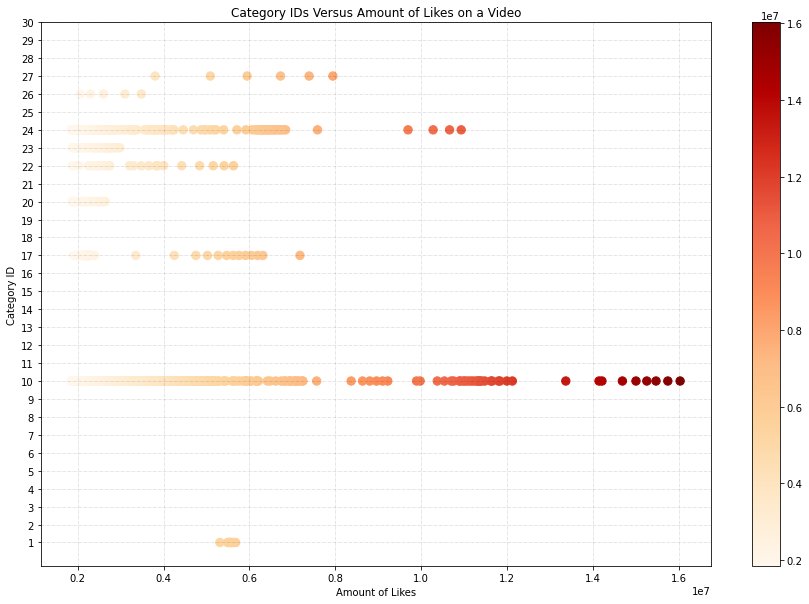

In [13]:
# Creating a scattergraph to show the amount of likes versus the category ids column
fig, ax = plt.subplots(figsize=(15,10))
plt.scatter(x = likes_sorted_youtube_statistics["likes"][:1000], 
            y = likes_sorted_youtube_statistics["categoryId"][:1000],
           c=likes_sorted_youtube_statistics["likes"][:1000],
           cmap="OrRd",
           s=70)
ax.set(title="Category IDs Versus Amount of Likes on a Video",
      xlabel="Amount of Likes",
      ylabel="Category ID")
plt.yticks(np.arange(1, 31, step=1))
plt.colorbar()
ax.grid(color ='black',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
plt.show()
# Top IDs: 10, 24, 27, 17, 22
# Exactly alive when compared against view counts.

## Comparing Views and Likes Against the Top 5 Category IDs: 10, 24, 27, 17, 22
* 10: Music
* 24: Entertainment
* 27: Education
* 17: Sports
* 22: People & Blogs

In [14]:
# Dropping all other ID numbers from the two sorted lists sorted_youtube_statistics and likes_sorted_youtube_statistics
# top_five_view_sorted
# top_five_like_sorted
sorted_youtube_statistics.dtypes
top_five_categories = [10, 24, 27, 17, 22]
sorted_youtube_statistics.shape
likes_sorted_youtube_statistics.shape

(119591, 16)

In [15]:
# Filter the DataFrames by categoryId
filtered_view_counts = sorted_youtube_statistics[sorted_youtube_statistics["categoryId"].isin(top_five_categories)]
filtered_likes = likes_sorted_youtube_statistics[likes_sorted_youtube_statistics["categoryId"].isin(top_five_categories)]
filtered_likes.shape
filtered_likes.head(30)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
56374,WMweEpGlu_U,BTS (방탄소년단) 'Butter' Official MV,2021-05-21T03:46:13Z,UC3IZKseVpdzPSBaWxBxundA,HYBE LABELS,10,2021-05-30T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,264407389,16021534,150989,6738537,https://i.ytimg.com/vi/WMweEpGlu_U/default.jpg,False,False,BTS (방탄소년단) 'Butter' Official MV Credits: Dire...
3358,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,10,2020-08-28T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,232649205,15735533,714194,6065230,https://i.ytimg.com/vi/gdZLi9oWNZg/default.jpg,False,False,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...
3137,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,10,2020-08-27T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,219110491,15460822,674291,5810680,https://i.ytimg.com/vi/gdZLi9oWNZg/default.jpg,False,False,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...
2894,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,10,2020-08-26T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,208581468,15246496,646349,5744496,https://i.ytimg.com/vi/gdZLi9oWNZg/default.jpg,False,False,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...
2653,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,10,2020-08-25T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,200692965,14994034,621578,5623570,https://i.ytimg.com/vi/gdZLi9oWNZg/default.jpg,False,False,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...
2418,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,10,2020-08-24T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,183414472,14678048,576852,5748638,https://i.ytimg.com/vi/gdZLi9oWNZg/default.jpg,False,False,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...
55994,WMweEpGlu_U,BTS (방탄소년단) 'Butter' Official MV,2021-05-21T03:46:13Z,UC3IZKseVpdzPSBaWxBxundA,HYBE LABELS,10,2021-05-23T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,166895681,14202518,51663,5987770,https://i.ytimg.com/vi/WMweEpGlu_U/default.jpg,False,False,BTS (방탄소년단) 'Butter' Official MV Credits: Dire...
2201,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,10,2020-08-23T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,160510938,14134480,505291,5452026,https://i.ytimg.com/vi/gdZLi9oWNZg/default.jpg,False,False,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...
55791,WMweEpGlu_U,BTS (방탄소년단) 'Butter' Official MV,2021-05-21T03:46:13Z,UC3IZKseVpdzPSBaWxBxundA,HYBE LABELS,10,2021-05-22T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,133484128,13361198,28528,5594286,https://i.ytimg.com/vi/WMweEpGlu_U/default.jpg,False,False,BTS (방탄소년단) 'Butter' Official MV Credits: Dire...
68979,CuklIb9d3fI,BTS (방탄소년단) 'Permission to Dance' Official MV,2021-07-09T03:59:12Z,UC3IZKseVpdzPSBaWxBxundA,HYBE LABELS,10,2021-07-16T00:00:00Z,HYBE|HYBE LABELS|하이브|하이브레이블즈,156482499,12117314,102132,2781218,https://i.ytimg.com/vi/CuklIb9d3fI/default.jpg,False,False,BTS (방탄소년단) 'Permission to Dance' Official MVC...


## The Top Five Youtube Categories: Comparing Their Amount of Likes and View Counts

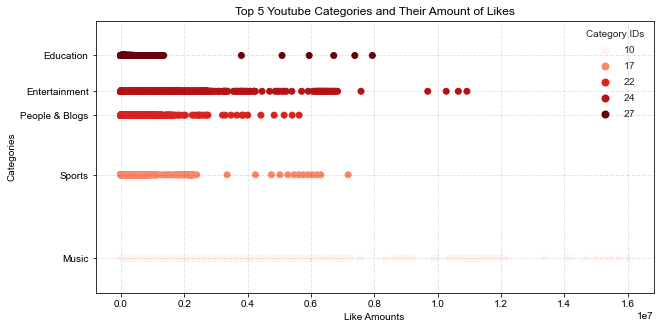

In [16]:
# Bargraph for the views
# Scattergraph for the likes

# Creating a scattergraph for the amount of likes among the top five categories.
fig, ax = plt.subplots(figsize=(10,5))
scatter = ax.scatter(x=filtered_likes["likes"],
                     y=filtered_likes["categoryId"],
                     c=filtered_likes["categoryId"],
                     cmap="Reds")

plt.style.use("seaborn")

ax.set(title="Top 5 Youtube Categories and Their Amount of Likes",
      xlabel="Like Amounts",
      ylabel="Categories")

ax.yaxis.set_ticks([10, 17, 22, 24, 27])

ax.legend(*scatter.legend_elements(),
          title="Category IDs")

ax.grid(color ='black',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

ax.set_yticklabels(["Music", "Sports", "People & Blogs", "Entertainment", "Education"])

plt.gca().margins(y=0.17)

plt.show()

#### When compared against the amount of video likes, the top five categories are:
1. Music (10)
2. Entertainment (24)
3. Education (27)
4. Sports (17)
5. People & blogs (22)

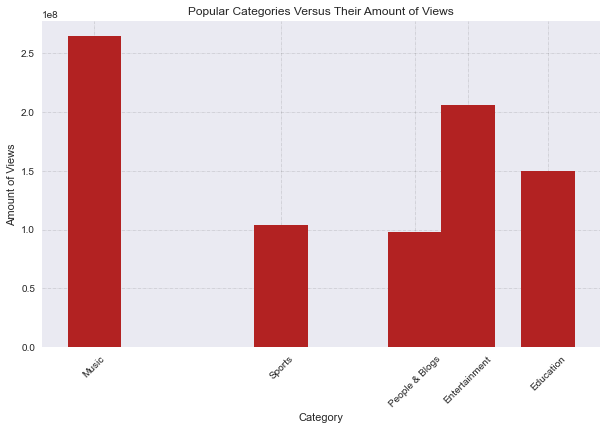

In [17]:
# Creating a bargraph to show the amount of views versus the top five categories.
fig, ax = plt.subplots(figsize=(10,6))
plt.style.use("seaborn")

bar = ax.bar(filtered_view_counts["categoryId"][:1000],
             filtered_view_counts["view_count"][:1000],
             width=2,
             color="firebrick")

ax.set(xlabel="Category",
       ylabel="Amount of Views",
       title="Popular Categories Versus Their Amount of Views")

ax.xaxis.set_ticks([10, 17, 22, 24, 27])

ax.set_xticklabels(["Music", "Sports", "People & Blogs", "Entertainment", "Education"])

plt.xticks(rotation=45)

ax.grid(color ='black',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)


plt.show()

#### When compared against the amount of video views, the top five categories are:
1. Music (10)
2. Entertainment (24)
3. Education (27)
5. Sports (17)
4. People & blogs (22)

In [18]:
# Breaking up the two filtered lists into 5 seperate filtered lists for the piechart

# Filtered likes
filtered_likes_music = filtered_likes[filtered_likes["categoryId"]==10]
filtered_likes_entertainment = filtered_likes[filtered_likes["categoryId"]==24]
filtered_likes_education = filtered_likes[filtered_likes["categoryId"]==27]
filtered_likes_sports = filtered_likes[filtered_likes["categoryId"]==17]
filtered_likes_people = filtered_likes[filtered_likes["categoryId"]==22]

# Filtered view counts
filtered_views_music = filtered_view_counts[filtered_view_counts["categoryId"]==10]
filtered_views_entertainment = filtered_view_counts[filtered_view_counts["categoryId"]==24]
filtered_views_education = filtered_view_counts[filtered_view_counts["categoryId"]==27]
filtered_views_sports = filtered_view_counts[filtered_view_counts["categoryId"]==17]
filtered_views_people = filtered_view_counts[filtered_view_counts["categoryId"]==22]

In [19]:
# Getting the amount of views per category
view_counts_music = filtered_views_music["view_count"].sum()
view_counts_entertainment = filtered_views_entertainment["view_count"].sum()
view_counts_education = filtered_views_education["view_count"].sum()
view_counts_sports = filtered_views_sports["view_count"].sum()
view_counts_people = filtered_views_people["view_count"].sum()

view_counts_data = [view_counts_music, view_counts_entertainment, 
view_counts_education, view_counts_sports, view_counts_people]

print(view_counts_data)

[91611393623, 78510927992, 5655313874, 27134363161, 23325124059]


In [20]:
# Getting the amount of likes per category 
like_count_music = filtered_likes_music["likes"].sum()
like_count_entertainment = filtered_likes_entertainment["likes"].sum()
like_count_education = filtered_likes_education["likes"].sum()
like_count_sports = filtered_likes_sports["likes"].sum()
like_count_people = filtered_likes_people["likes"].sum()

like_count_data = [like_count_music, like_count_entertainment, like_count_education, 
                   like_count_sports, like_count_people]
print(like_count_data)

[6162979582, 4063064088, 326544490, 696678077, 1349155842]


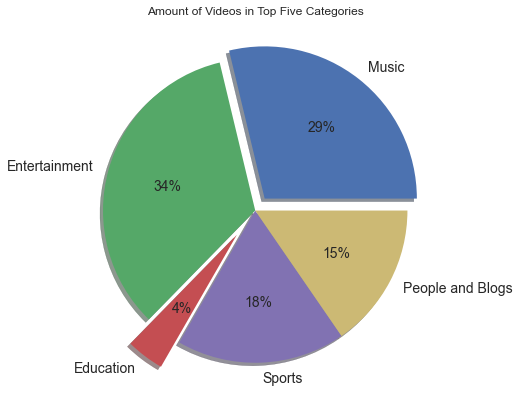

In [21]:
# An interactive piechart showcasing the amount of likes versus views in the top 5 categories of youtube videos
# Click to show categories versus views
# Click to show categories versus likes
# How many videos are within each category?
# print(len(filtered_views_sports))

# Showing amount of videos in each category
vid_amounts = [20374, 24037, 2844, 12683, 10917]

ids = ['Music', 'Entertainment', 'Education', 'Sports', 'People and Blogs']

explode = [0.1,0,0.2,0,0]

fig,ax = plt.subplots(figsize=(10,7))

ax.pie(vid_amounts, labels=ids, autopct='%.0f%%', explode=explode, shadow=True, textprops={'fontsize': 14})

ax.set_title("Amount of Videos in Top Five Categories")

plt.show()

In [22]:
# Creating options for the widget
#dataset_dropdown = widgets.Dropdown(options=zip(like_count_data, view_counts_data))
#dataset_dropdown

In [23]:
# Define a function to create a piechart

def create_pie(Data):
    """
    Creates a pie chart and takes in the ids list in the above cell and a numerical dataset.
    """
    fig,ax = plt.subplots(figsize=(10,7))
    
    ids = ['Music', 'Entertainment', 'Education', 'Sports', 'People and Blogs']
    
    explode = [0,0.1,0.1,0.1,0.1]

    ax.pie(Data, labels=ids, autopct='%.0f%%' , shadow=True, textprops={'fontsize': 14}, explode=explode)

    if Data == like_count_data:
        ax.set_title(f"Amount of Likes in the Top Five Categories")
    else:
        ax.set_title(f"Amount of Views in the Top Five Categories")
        
    plt.show()


In [24]:
widgets.interact(create_pie, Data=[('Like Counts', like_count_data), ('View Counts', view_counts_data)]);

interactive(children=(Dropdown(description='Data', options=(('Like Counts', [6162979582, 4063064088, 326544490…

### The Amount of Likes per Top 5 Categories
* Despite Education being one the top 3 categories, it receives the least amount of likes.
* Entertainment and Music receive the most amount of likes.

### The Amount of Views per Top 5 Categories
* As stated above, despite the Education category being more popular that Sports and People and Blogs,
it still receives the least amount of views.
* Entertainment and Music make up the most amount of views on Youtube.

## Using Ridge Regression to Predict a Category for a YouTube Video
### Preparing the Data

In [25]:
# Turning non-numeric data into pandas categories
# Copy the raw data into a temporary DataFrame
temp_raw_data = youtube_csv_df
temp_raw_data.head().T

,0,1,2,3,4
video_id,3C66w5Z0ixs,M9Pmf9AB4Mo,J78aPJ3VyNs,kXLn3HkpjaA,VIUo6yapDbc
title,I ASKED HER TO BE MY GIRLFRIEND...,Apex Legends | Stories from the Outlands – “Th...,I left youtube for a month and THIS is what ha...,XXL 2020 Freshman Class Revealed - Official An...,Ultimate DIY Home Movie Theater for The LaBran...
publishedAt,2020-08-11T19:20:14Z,2020-08-11T17:00:10Z,2020-08-11T16:34:06Z,2020-08-11T16:38:55Z,2020-08-11T15:10:05Z
channelId,UCvtRTOMP2TqYqu51xNrqAzg,UC0ZV6M2THA81QT9hrVWJG3A,UCYzPXprvl5Y-Sf0g4vX-m6g,UCbg_UMjlHJg_19SZckaKajg,UCDVPcEbVLQgLZX0Rt6jo34A
channelTitle,Brawadis,Apex Legends,jacksepticeye,XXL,Mr. Kate
categoryId,22,20,24,10,26
trending_date,2020-08-12T00:00:00Z,2020-08-12T00:00:00Z,2020-08-12T00:00:00Z,2020-08-12T00:00:00Z,2020-08-12T00:00:00Z
tags,brawadis|prank|basketball|skits|ghost|funny vi...,Apex Legends|Apex Legends characters|new Apex ...,jacksepticeye|funny|funny meme|memes|jacksepti...,xxl freshman|xxl freshmen|2020 xxl freshman|20...,The LaBrant Family|DIY|Interior Design|Makeove...
view_count,1514614,2381688,2038853,496771,1123889
likes,156908,146739,353787,23251,45802


In [26]:
# Find columns that contain strings
for label, content in temp_raw_data.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

video_id
title
publishedAt
channelId
channelTitle
trending_date
tags
thumbnail_link
description


In [27]:
# Define the user input. 

# https://stackoverflow.com/questions/56717542/how-to-make-prediction-with-single-sample-in-sklearn-model-predict
# https://stackoverflow.com/questions/50090767/single-prediction-with-linear-regression
title = input("Type the title of your video: ")
channel = input("Type the name of your channel: ")
view_amount = int(input("Type the number of views you're aiming for in number form with no commas: "))
like_amount = int(input("Type the number of video likes you're aiming for in number form with no commas: "))
comment_amount = int(input("Type the number of comments you're aiming for in number form with no commas: "))
comments_disabled_string = input("Will comments be disabled? Type True for yes or False for no: ")
ratings_disabled_string = input("Will ratings be disabled? Type True for yes or False for no: ")
description = input("Type the description of your video: ")

# User must input: title, channel title, amount of views they would like, amount of likes they would like,
# amount of comments they would like, if they will disable comments (T or F), if they will disable ratings (T or F),
# and a description
#user_input = np.array([title,channel, 0, view_amount, like_amount, comment_amount, comments_disabled,
                     # ratings_disabled, description])

Type the title of your video: some random movie
Type the name of your channel: zero-one
Type the number of views you're aiming for in number form with no commas: 100
Type the number of video likes you're aiming for in number form with no commas: 200
Type the number of comments you're aiming for in number form with no commas: 5
Will comments be disabled? Type True for yes or False for no: False
Will ratings be disabled? Type True for yes or False for no: False
Type the description of your video: just a home movie for family


In [28]:
# Create a function for the bool inputs that reads the strings and attributes the correct bool
# value based on the value input by the user.
def bool_translater(string_value):
    """
    This function takes in a string value and translates it to its
    correct boolean value.
    """
    if string_value == "True":
        string_value = True
    else:
        string_value = False
    return string_value

In [29]:
# Change string values to boolean values via the above function.
comments_disabled = bool_translater(comments_disabled_string)
ratings_disabled = bool_translater(ratings_disabled_string)
print(ratings_disabled)

False


In [30]:
# Dropping features that aren't needed.
temp_raw_data.drop(["video_id", "channelId", "trending_date", "dislikes", "thumbnail_link", "tags", "publishedAt"],
                  axis=1, inplace=True)

In [31]:
# Add user_input to the dataframe as a dictionary
user_input_df = {'title':title, 'channelTitle': channel, 'categoryId':0, 'view_count': view_amount, "likes":
                like_amount, "comment_count": comment_amount, "comments_disabled": comments_disabled,
                "ratings_disabled": ratings_disabled, "description":description}
temp_raw_data = temp_raw_data.append(user_input_df, ignore_index=True)

C:\Users\Christine Estopare\AppData\Local\Temp\ipykernel_5888\1680291317.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_raw_data = temp_raw_data.append(user_input_df, ignore_index=True)


In [32]:
temp_raw_data.tail()

,title,channelTitle,categoryId,view_count,likes,comment_count,comments_disabled,ratings_disabled,description
119587,The hardest boss of the hardest challenge in M...,SmallAnt,20,1164904,47619,1483,False,False,Touch Cappy = DEATHYou should watch me live on...
119588,Rory McIlroy Plays Us With Only A 6 Iron,Fore Play Golf,17,377837,5599,260,False,False,Rory McIlroy was our first opponent for this y...
119589,Watching *THE ADAM PROJECT* because Netflix to...,Dylan Is In Trouble,24,521380,40507,2048,False,False,Go to http://audible.com/dylanisintrouble or t...
119590,[퀸덤2] OPENING SHOW - 이달의 소녀(LOONA) | 3/31 (목) ...,Mnet K-POP,24,2713526,173946,48720,False,False,[퀸덤2] OPENING SHOW - 이달의 소녀(LOONA) | 3/31 (목) ...
119591,some random movie,zero-one,0,100,200,5,False,False,just a home movie for family


In [33]:
# Check data type of objects in array
#user_input.dtype
#user_input
#print(type(like_amount))
#print(type(comments_disabled))

In [34]:
# Add user input to the temp_raw_data dataframe
#user_input
#temp_raw_data = temp_raw_data.append(pd.DataFrame(user_input.reshape(1,-1), 
#                                                  columns=list(temp_raw_data)), ignore_index=True)

In [35]:
temp_raw_data.tail()

,title,channelTitle,categoryId,view_count,likes,comment_count,comments_disabled,ratings_disabled,description
119587,The hardest boss of the hardest challenge in M...,SmallAnt,20,1164904,47619,1483,False,False,Touch Cappy = DEATHYou should watch me live on...
119588,Rory McIlroy Plays Us With Only A 6 Iron,Fore Play Golf,17,377837,5599,260,False,False,Rory McIlroy was our first opponent for this y...
119589,Watching *THE ADAM PROJECT* because Netflix to...,Dylan Is In Trouble,24,521380,40507,2048,False,False,Go to http://audible.com/dylanisintrouble or t...
119590,[퀸덤2] OPENING SHOW - 이달의 소녀(LOONA) | 3/31 (목) ...,Mnet K-POP,24,2713526,173946,48720,False,False,[퀸덤2] OPENING SHOW - 이달의 소녀(LOONA) | 3/31 (목) ...
119591,some random movie,zero-one,0,100,200,5,False,False,just a home movie for family


In [36]:
# Turning all string values into category values
for label, content in temp_raw_data.items():
    if pd.api.types.is_string_dtype(content):
        temp_raw_data[label] = content.astype("category").cat.as_ordered()

In [37]:
temp_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119592 entries, 0 to 119591
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   title              119592 non-null  category
 1   channelTitle       119592 non-null  category
 2   categoryId         119592 non-null  int64   
 3   view_count         119592 non-null  int64   
 4   likes              119592 non-null  int64   
 5   comment_count      119592 non-null  int64   
 6   comments_disabled  119592 non-null  bool    
 7   ratings_disabled   119592 non-null  bool    
 8   description        116216 non-null  category
dtypes: bool(2), category(3), int64(4)
memory usage: 6.1 MB


In [38]:
temp_raw_data.title.cat.codes

0          7945
1          1575
2          8951
3         20943
4         19352
          ...  
119587    18412
119588    15293
119589    19946
119590    21422
119591    21859
Length: 119592, dtype: int16

In [39]:
# Check for missing data
temp_raw_data.isnull().sum()

title                   0
channelTitle            0
categoryId              0
view_count              0
likes                   0
comment_count           0
comments_disabled       0
ratings_disabled        0
description          3376
dtype: int64

In [40]:
# Fill missing values in description
# Check to see if description is numeric
for label, content in temp_raw_data.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)
# Not numeric

title
channelTitle
description


In [41]:
pd.Categorical(temp_raw_data["description"]).codes

array([13328, 19924,  7260, ...,  5734, 20536, 20975], dtype=int16)

In [42]:
# Fill missing data in description
for label, content in temp_raw_data.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Turn categories into numbers and add + 1
        temp_raw_data[label] = pd.Categorical(content).codes + 1

In [43]:
temp_raw_data.isna().sum()

title                0
channelTitle         0
categoryId           0
view_count           0
likes                0
comment_count        0
comments_disabled    0
ratings_disabled     0
description          0
dtype: int64

In [44]:
temp_raw_data.tail()

,title,channelTitle,categoryId,view_count,likes,comment_count,comments_disabled,ratings_disabled,description
119587,18413,4113,20,1164904,47619,1483,False,False,17981
119588,15294,1646,17,377837,5599,260,False,False,13129
119589,19947,1348,24,521380,40507,2048,False,False,5735
119590,21423,3076,24,2713526,173946,48720,False,False,20537
119591,21860,5494,0,100,200,5,False,False,20976


### Building the Model

In [45]:
temp_raw_data.head()
# Drop comments_disabled and ratings_disabled

,title,channelTitle,categoryId,view_count,likes,comment_count,comments_disabled,ratings_disabled,description
0,7946,623,22,1514614,156908,35313,False,False,13329
1,1576,294,20,2381688,146739,16549,False,False,19925
2,8952,5309,24,2038853,353787,40221,False,False,7261
3,20944,5048,10,496771,23251,7647,False,False,14777
4,19353,3134,26,1123889,45802,2196,False,False,17997


In [46]:
# Dropping video id, channel id, trending date, dislikes, thumbnail link, tags, published at, 
#temp_raw_data.drop(["video_id", "channelId", "trending_date", "dislikes", "thumbnail_link", "tags", "publishedAt"],
#                  axis=1, inplace=True)

In [47]:
temp_raw_data.head()

,title,channelTitle,categoryId,view_count,likes,comment_count,comments_disabled,ratings_disabled,description
0,7946,623,22,1514614,156908,35313,False,False,13329
1,1576,294,20,2381688,146739,16549,False,False,19925
2,8952,5309,24,2038853,353787,40221,False,False,7261
3,20944,5048,10,496771,23251,7647,False,False,14777
4,19353,3134,26,1123889,45802,2196,False,False,17997


In [48]:
len(temp_raw_data)

119592

In [49]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Make findings reproducable
np.random.seed(42)

# Instantiate model
model = make_pipeline(StandardScaler(with_mean=False), Ridge())
#model = Ridge(alpha = 1.0,
             #normalize = True)
    
# Split the model into train and test sets
X = temp_raw_data.drop("categoryId", axis=1)
y = temp_raw_data["categoryId"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit the model
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler(with_mean=False)),
                ('ridge', Ridge())])

In [50]:
# Score the model on the test set
model.score(X_test, y_test)

0.017432838836948794

In [51]:
# Make predictions with the model
y_preds = model.predict(X_test)
y_preds[:10]

array([18.75449531, 19.42992978, 17.15678337, 19.20158226, 18.5999112 ,
       18.92914428, 18.35663655, 19.21676349, 18.25406052, 18.66403404])

In [52]:
np.array(y_test[:10])

array([20, 17, 23, 28, 20, 17, 25, 24,  2, 17], dtype=int64)

In [53]:
len(y_preds), len(y_test)

(23919, 23919)

### Evaluating the Model

In [54]:
# Using score to evaluate the model
np.random.seed(42)

model.score(X_test, y_test)

0.017432838836948794

In [55]:
model_score = model.score(X_test, y_test)
print(f"Model Score: {model_score*100:.2f} %")

Model Score: 1.74 %


### Making Predictions with the Model

In [56]:
y_preds.dtype

dtype('float64')

In [57]:
category_preds = pd.DataFrame()
category_preds["Predicted Catogory IDs"] = y_preds.astype(int)

In [58]:
# Predictions on the test data. 
category_preds

,Predicted Catogory IDs
0,18
1,19
2,17
3,19
4,18
...,...
23914,18
23915,18
23916,18
23917,18


### Taking User Input for Category Predictions

In [59]:
X_test.dtypes

title                int16
channelTitle         int16
view_count           int64
likes                int64
comment_count        int64
comments_disabled     bool
ratings_disabled      bool
description          int16
dtype: object

In [60]:
# Convert numpy array to pandas DataFrame
#user_input_df = pd.DataFrame([user_input], columns=["Title", "Channel Name", "Views", "Likes", "Comments",
 #                                                 "Comments Disabled", "Ratings Disabled", "Description"])
#user_input_df

In [61]:
# Convert input to numbers
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.compose import ColumnTransformer

#categorical_features = ["Title", "Channel Name", "Description"]
#one_hot = OneHotEncoder()
#transformer = ColumnTransformer([("one_hot",
 #                                 one_hot,
  #                                categorical_features)],
   #                             remainder="passthrough")
#transformed_user_input = transformer.fit_transform(user_input_df)

In [62]:
# Pull out row with user_input and turn it into an array.
# temp_raw_data.tail()
#display(temp_raw_data.iloc[119591])
user_row = temp_raw_data.iloc[119591].to_numpy()
user_row_final = np.delete(user_row,2)
user_row_final = user_row_final.reshape(1,-1)
user_row_final

array([[21860, 5494, 100, 200, 5, False, False, 20976]], dtype=object)

In [63]:
# Predict on the user_row array
model.predict(user_row_final)
user_cat_id = int(model.predict(user_row_final))
print(user_cat_id)

19


C:\Users\Christine Estopare\Desktop\WGU\WGU Folder\Active Course\Capstone\Capstone\ML_Solution_Notebook\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Christine Estopare\Desktop\WGU\WGU Folder\Active Course\Capstone\Capstone\ML_Solution_Notebook\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [64]:
# Show user their category ID number prediction based on input
def category_shower(category_id):
    """
    This function outputs the string associated with the 
    predicted category ID number as found in the associated JSON file.
    """
    if user_cat_id == 1:
        print("Film & Animation")
    elif user_cat_id == 2:
        print("Autos & Vehicles")
    elif user_cat_id == 10:
        print("Music")
    elif user_cat_id == 15:
        print("Pets & Animals")
    elif user_cat_id == 17:
        print("Sports")
    elif user_cat_id == 18:
        print("Short Movies")
    elif user_cat_id == 19:
        print("Travel & Events")
    elif user_cat_id == 20:
        print("Gaming")
    elif user_cat_id == 21:
        print("Videoblogging")
    elif user_cat_id == 22:
        print("People & Blogs")
    elif user_cat_id == 23:
        print("Comedy")
    elif user_cat_id == 24:
        print("Entertainment")
    elif user_cat_id == 25:
        print("News & Politics")
    elif user_cat_id == 26:
        print("How to & Style")
    elif user_cat_id == 27:
        print("Education")
    elif user_cat_id == 28:
        print("Science & Technology")
    elif user_cat_id == 29:
        print("Nonprofits & Activism")
    elif user_cat_id == 30:
        print("Movies")
    elif user_cat_id == 31:
        print("Anime/Animation")
    elif user_cat_id == 32:
        print("Action/Adventure")
    elif user_cat_id == 33:
        print("Classics")
    elif user_cat_id == 34:
        print("Comedy")
    elif user_cat_id == 35:
        print("Documentary")
    elif user_cat_id == 36:
        print("Drama")
    elif user_cat_id == 37:
        print("Family")
    elif user_cat_id == 38:
        print("Foreign")
    elif user_cat_id == 39:
        print("Horror")
    elif user_cat_id == 40:
        print("Sci-Fi/Fantasy")
    elif user_cat_id == 41:
        print("Thriller")
    elif user_cat_id == 42:
        print("Shorts")
    elif user_cat_id == 43:
        print("Shows")
    elif user_cat_id == 44:
        print("Trailers")

In [65]:
category_shower(user_cat_id)

Travel & Events


# Getting Dependencies

In [2]:
import pip
import types

In [3]:
def imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            yield val.__name__
list(imports())

['builtins', 'builtins', 'pip', 'types']

In [4]:
for i in pip.get_:
    print(i)

AttributeError: module 'pip' has no attribute 'get_installed_distributions'